In [33]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

<h2> data clean-up

In [34]:
df = pd.read_csv('../data/model_3_data.csv',sep=';')
print(len(df))
df.head()

837


,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code
0,359.600 kr.,2022,12000,2022-03-14,El,74.1,283,A,3300
1,339.998 kr.,2020,93000,2019-03-04,El,75.1,498,A,2630
2,428.800 kr.,2021,29500,2021-08-31,El,66.9,513,A,2670
3,399.900 kr.,2021,20500,2021-03-19,El,66.9,513,A,2610
4,434.500 kr.,2021,17681,2021-09-27,El,75.1,498,A,2670


In [35]:
#Cleans price and first regestration
df['price'] = df['price'].str.replace(r'\D','',regex=True)
df['price'] = df['price'].astype('int64')
df['reg'] = df['reg'].str.split('-').str[0]
df['reg'] = df['reg'].astype('int64')
df

,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code
0,359600,2022,12000,2022,El,74.1,283,A,3300
1,339998,2020,93000,2019,El,75.1,498,A,2630
2,428800,2021,29500,2021,El,66.9,513,A,2670
3,399900,2021,20500,2021,El,66.9,513,A,2610
4,434500,2021,17681,2021,El,75.1,498,A,2670
...,...,...,...,...,...,...,...,...,...
832,299000,2021,32000,2021,El,77.8,325,A,5230
833,444900,2021,11000,2021,El,75.1,476,A,9430
834,449800,2021,9000,2022,El,66.9,513,A,6580
835,418500,2021,14062,2021,El,66.9,513,A,6330


In [36]:
#selects target and features
X = df[['model_year', 'km','reg','fuel_economy','horse_power']]
y = df['price']

In [37]:
#Test train split of data, 33% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

<h2> Linear Regression model

In [38]:
#fits model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

#degree of linear correlation between data and target
print(f'Regression score: {regr.score(X_train,y_train)}')

Regression score: 0.7309696682560873


In [39]:
#Test of 5 cars
print(f'Car 1: Predicted price: {regr.predict(X_test[0:1])[0].round(2)}kr - actual price: {y_test[0:1].values[0]}kr')
print(f'Car 2: Predicted price: {regr.predict(X_test[1:2])[0].round(2)}kr - actual price: {y_test[1:2].values[0]}kr')
print(f'Car 3: Predicted price: {regr.predict(X_test[2:3])[0].round(2)}kr - actual price: {y_test[2:3].values[0]}kr')
print(f'Car 4: Predicted price: {regr.predict(X_test[3:4])[0].round(2)}kr - actual price: {y_test[3:4].values[0]}kr')
print(f'Car 5: Predicted price: {regr.predict(X_test[4:5])[0].round(2)}kr - actual price: {y_test[4:5].values[0]}kr')

Car 1: Predicted price: 391651.31kr - actual price: 409900kr
Car 2: Predicted price: 363328.96kr - actual price: 389900kr
Car 3: Predicted price: 352826.9kr - actual price: 349800kr
Car 4: Predicted price: 377730.73kr - actual price: 369800kr
Car 5: Predicted price: 381560.65kr - actual price: 379800kr


In [40]:
#Method to get prediction score
def get_prediction_score(target,pred_target):
    score_list = []
    for num1,num2 in zip(target,pred_target):
        if num1 > num2:
            score_list.append(num2/num1*100)
        elif num2 > num1:
            score_list.append(num1/num2*100)
        else:
            score_list.append(100)
    return sum(score_list) / len(score_list)

In [41]:
#Test of prediction score
y_pred = regr.predict(X_test)
get_prediction_score(y_test,y_pred)

95.32402799859452

<h2> Decision tree regressor

In [42]:
#Fit and model score
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
#predictions = model.predict(X_test)
dtr.score(X_test, y_test)

0.6247927652178533

In [43]:
#Test of 5 cars
print(f'Car 1: Predicted price: {dtr.predict(X_test[0:1])[0].round(2)}kr - actual price: {y_test[0:1].values[0]}kr')
print(f'Car 2: Predicted price: {dtr.predict(X_test[1:2])[0].round(2)}kr - actual price: {y_test[1:2].values[0]}kr')
print(f'Car 3: Predicted price: {dtr.predict(X_test[2:3])[0].round(2)}kr - actual price: {y_test[2:3].values[0]}kr')
print(f'Car 4: Predicted price: {dtr.predict(X_test[3:4])[0].round(2)}kr - actual price: {y_test[3:4].values[0]}kr')
print(f'Car 5: Predicted price: {dtr.predict(X_test[4:5])[0].round(2)}kr - actual price: {y_test[4:5].values[0]}kr')

Car 1: Predicted price: 365000.0kr - actual price: 409900kr
Car 2: Predicted price: 389949.5kr - actual price: 389900kr
Car 3: Predicted price: 379800.0kr - actual price: 349800kr
Car 4: Predicted price: 359800.0kr - actual price: 369800kr
Car 5: Predicted price: 379900.0kr - actual price: 379800kr


In [44]:
#Test of prediction score
y_pred = dtr.predict(X_test)
get_prediction_score(y_test,y_pred)

94.42830897111727

<h1>data visualization

,price,model_year,km,reg,fuel_economy,horse_power,zip_code
price,1.000000,0.445486,-0.477357,0.411472,-0.213125,0.622299,0.094243
model_year,0.445486,1.000000,-0.725733,0.934837,0.368248,-0.110814,0.130818
km,-0.477357,-0.725733,1.000000,-0.747862,-0.351906,0.106976,-0.132719
reg,0.411472,0.934837,-0.747862,1.000000,0.382081,-0.167331,0.162013
fuel_economy,-0.213125,0.368248,-0.351906,0.382081,1.000000,-0.559598,0.029749
horse_power,0.622299,-0.110814,0.106976,-0.167331,-0.559598,1.000000,-0.060326
zip_code,0.094243,0.130818,-0.132719,0.162013,0.029749,-0.060326,1.000000


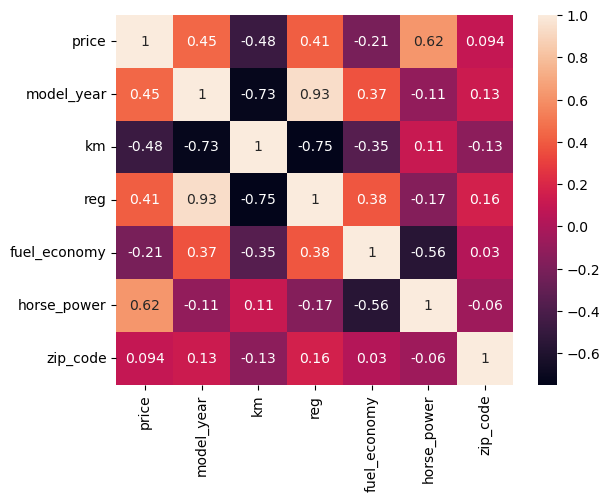

In [45]:
#Heatmap to show correlation between target and feautres
sns.heatmap(df.corr(), annot=True)
df.corr()

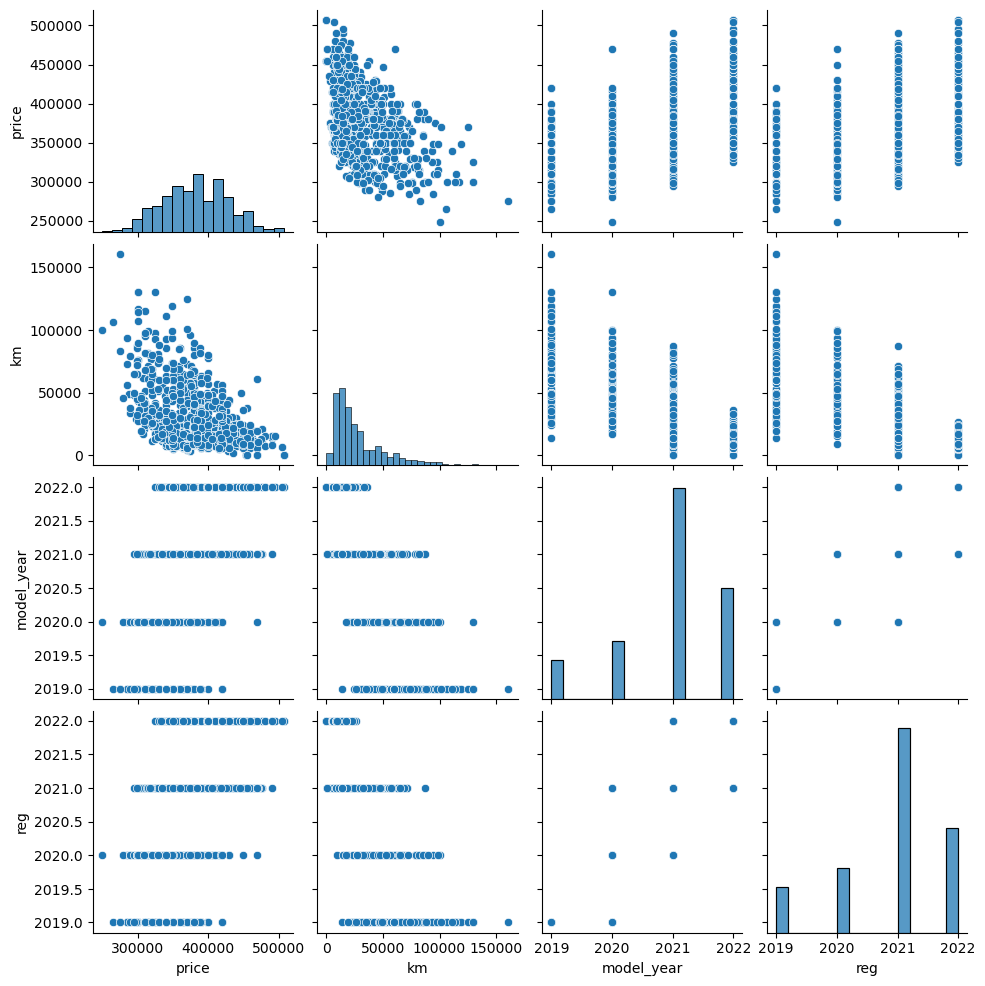

In [46]:
#Plots
sns.pairplot(df[['price','km','model_year','reg']])

<AxesSubplot:xlabel='price', ylabel='km'>

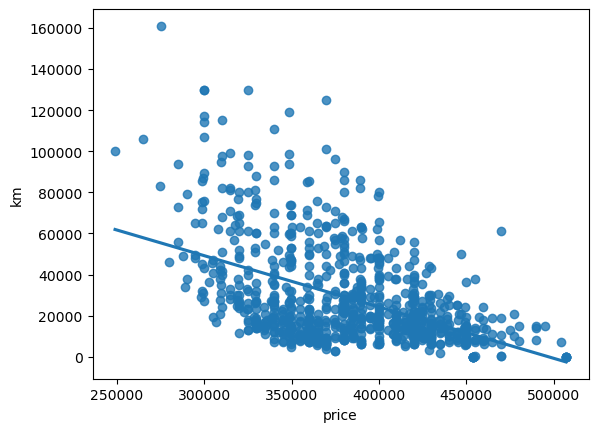

In [47]:
#regplot with price and model year
sns.regplot(x=df['price'], y=df['km'], ci=None)

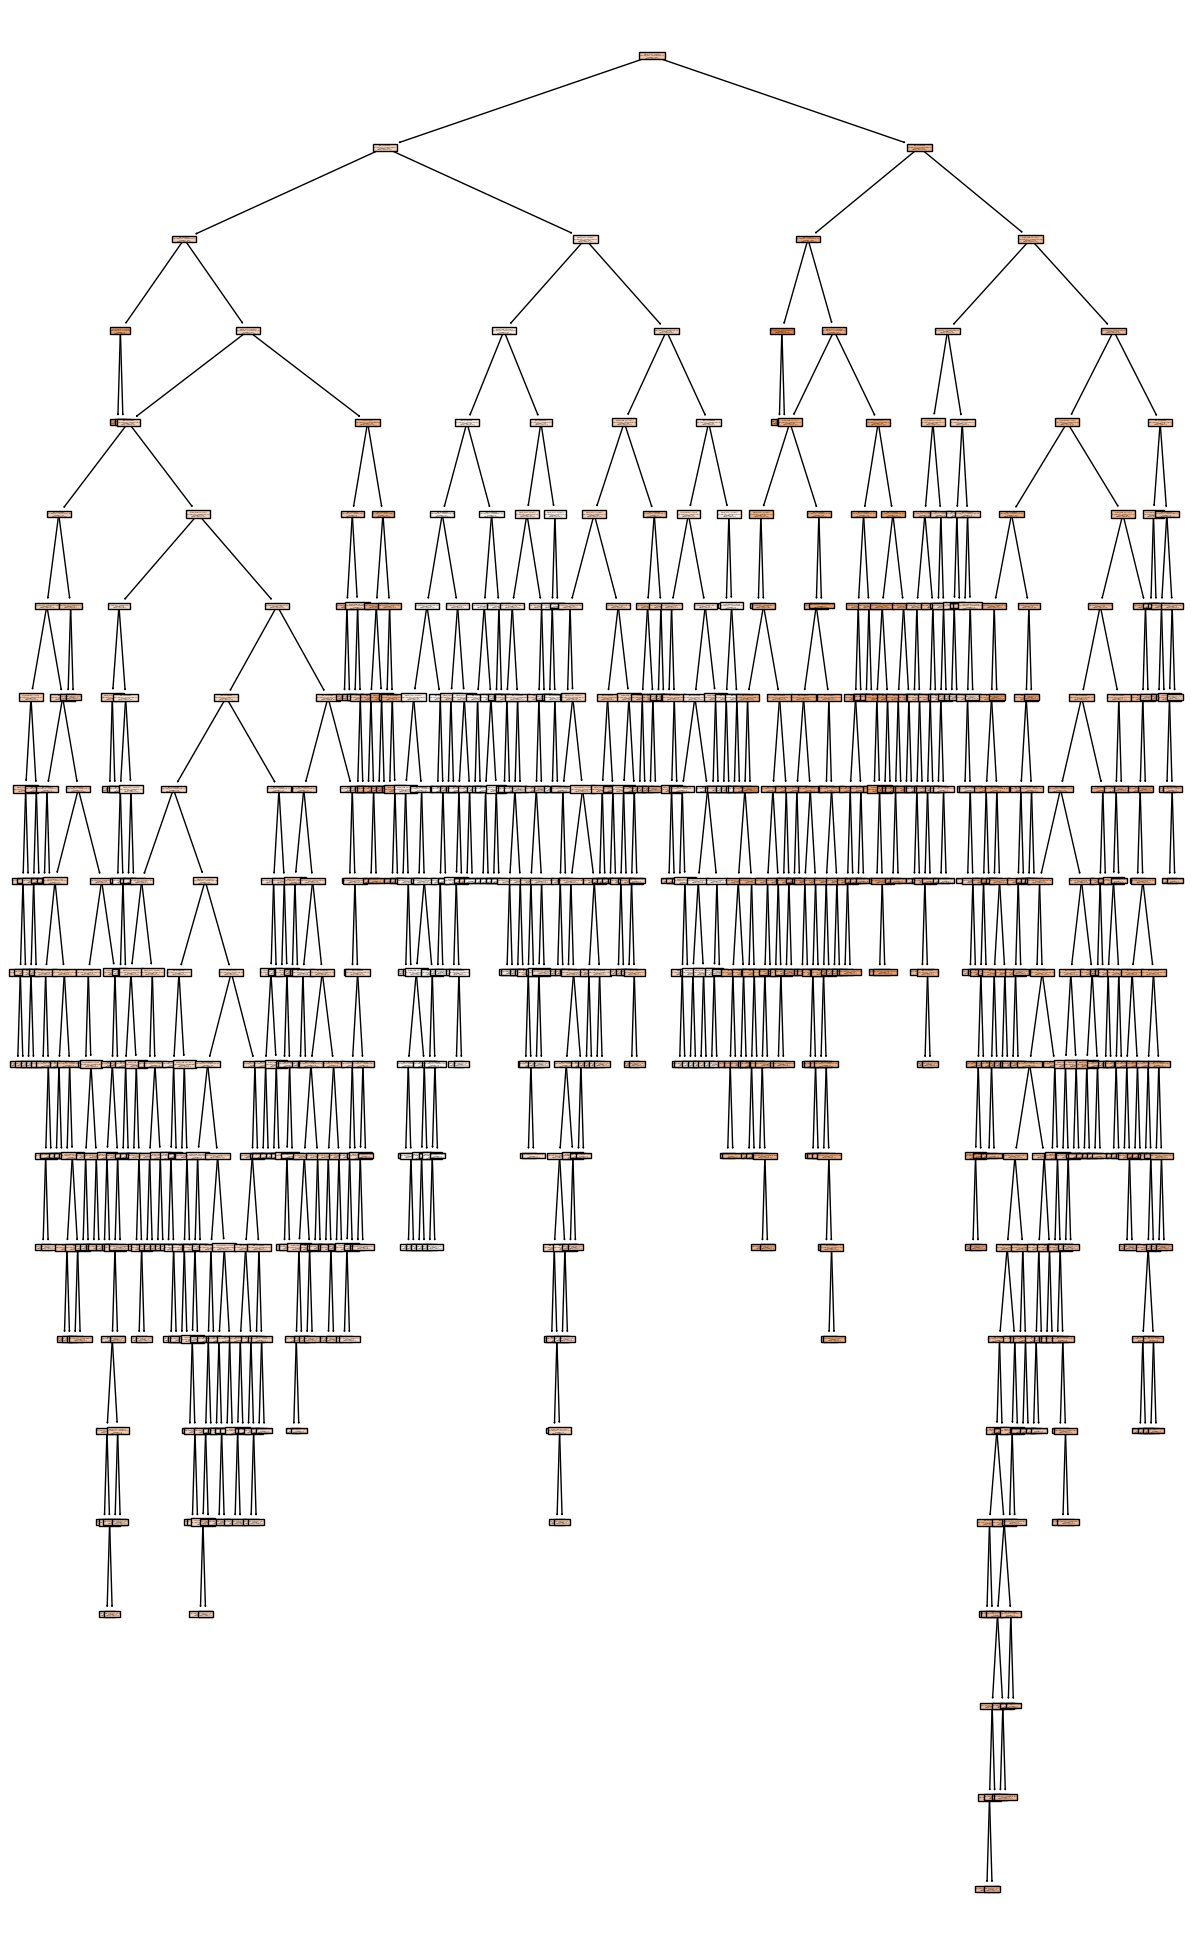

In [48]:
#map of the descision tree
fig = plt.figure(figsize=(15,25))
_= tree.plot_tree(dtr, feature_names=X.columns, filled=True)